<a href="https://colab.research.google.com/github/restrepo/ComputationalMethods/blob/master/material/Minimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Minimization
Find the minumum of a function

---
## Bibliography
[1] [Optimization and fit scipy optimize](https://scipy-lectures.org/intro/scipy.html#optimization-and-fit-scipy-optimize) 
* [Example](https://scipy-lectures.org/intro/scipy/auto_examples/plot_optimize_example2.html)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import scipy.optimize as optimize
import scipy.interpolate as interpolate
import pandas as pd

## Example

Consider the following dataset

In [3]:
df=pd.DataFrame({'X':[2.5,3.1,4.5,5,5.9,6.2],
              'Y':[3,-1.01,1.5,0.7,2.8,1.5]})
df

,X,Y
0,2.5,3.00
1,3.1,-1.01
2,4.5,1.50
3,5.0,0.70
4,5.9,2.80
5,6.2,1.50


### Laggrange interpolation

In [4]:
pol=interpolate.lagrange(df.X,df.Y)

In [5]:
print(pol)

         5         4         3         2
-0.8941 x + 19.97 x - 174.7 x + 746.7 x - 1557 x + 1264


`df.X` is a Pandas Series

In [6]:
df.X

0    2.5
1    3.1
2    4.5
3    5.0
4    5.9
5    6.2
Name: X, dtype: float64

To obtain some specific valuea by using slices, we must use `.iloc`

Note that `df.X[3]=df.X.loc[3]=df.X.iloc[3]`

In [7]:
df.X[3],df.X.loc[3],df.X.iloc[3]

(5.0, 5.0, 5.0)

In [8]:
df.X.iloc[-1]

6.2

works!

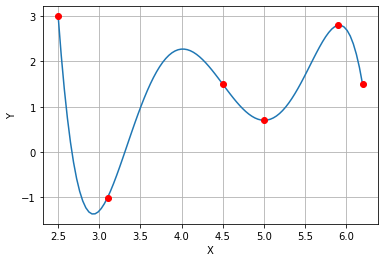

In [9]:
x=np.linspace(df.X.iloc[0],df.X.iloc[-1],100)
plt.plot(x,pol(x))
plt.plot(df.X,df.Y,'ro')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

## Hermite interpolation
The recommend degree for the Hermite polynomial is $n-1$ where $n$ is the number of data of the dataset

In [ ]:
H=np.polynomial.hermite.Hermite.fit(df.X,df.Y,5)

Text(0, 0.5, '$H(x)$')

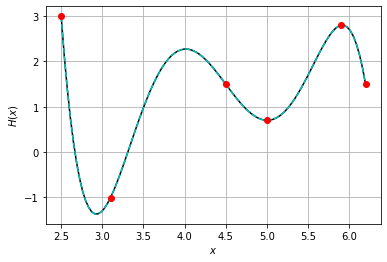

In [18]:
plt.plot(x,H(x),'k-')
plt.plot(x,pol(x),'c--')
plt.plot(df.X,df.Y,'ro')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$H(x)$')

## Finding the local minimums of a function

Finding the first minimum close to  <font color="red">3</font> (which corresponds to the global minimum), and the sceond close to <font color="red">5</font>  (a  local minimum)

In [19]:
min1=optimize.fmin_powell(pol,3,full_output=True)
min2=optimize.fmin_powell(pol,5.2,full_output=True)

Optimization terminated successfully.
         Current function value: -1.374113
         Iterations: 2
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.699898
         Iterations: 2
         Function evaluations: 50


In [20]:
min1

(array(2.92784955), array(-1.37411316), array([[1.]]), 2, 28, 0)

In [21]:
print('The global minimum is f(x)={} for x={};\n the local minimum is f(x)={} for x={}'.format(
    min1[1],min1[0],min2[1],min2[0]))

El mínimo global es f(x)=-1.3741131581291484 para x=2.9278495523433894;
 el mínimo local es f(x)=0.6998981514389016 para x=5.004929292406532


**Activity** Find the maximum values of the Hermite interpolation function of degree 5 to the set of points: https://github.com/restrepo/ComputationalMethods/blob/master/data/hermite.csv



Text(0,0.5,'$H(x)$')

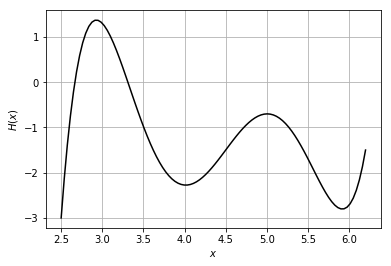

In [29]:
df=pd.read_csv('https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/hermite.csv')
H=np.polynomial.hermite.Hermite.fit(df.X,df.Y,5)
x=np.linspace(df.X.iloc[0],df.X.iloc[-1],100)
plt.plot(x,-H(x),'k-')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$H(x)$')

`fmin_powell` try to search the global minimum

In [50]:
optimize.fmin_powell(-H,4.5)

Optimization terminated successfully.
         Current function value: -2.803764
         Iterations: 2
         Function evaluations: 27


array(5.918213)

### Find a local minumum

close minimum

In [55]:
min1=optimize.minimize(-H,x0=4)
min1['x']

array([4.01502381])

In [56]:
min1=optimize.minimize(-H,5.2)
min1['x']

array([5.91821427])

minimum in a range

In [58]:
min1=optimize.minimize(-H,x0=4,bounds=((3.5, 4.5), ) )
min1['x']

array([4.0150238])

In [43]:
xmin_local = optimize.fminbound(-H, 3.5, 4.5)
xmin_local

4.015025330027828

In [59]:
optimize.brute(-H,ranges=((3.5,4.5,0.1),))

array([4.01503906])

### Find a global minumum (alternative)

In [68]:
min1=optimize.basinhopping(-H,5.5)
min1['x']

array([5.91821429])

In [69]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## The Higgs potential
To write greek letter inside a cell use the $\rm \LaTeX$ macro and the tab, e.g: `\mu<TAB>`, to produce μ

In [71]:
α=2

In [72]:
m_H=126 # GeV
G_F=1.1663787E-5 #GeV^-2
v=1/np.sqrt(np.sqrt(2.)*G_F) # GeV
μ=np.sqrt(m_H**2/2)
λ=m_H**2/(2.*v**2)
μ,λ

(89.09545442950498, 0.13093799079487806)

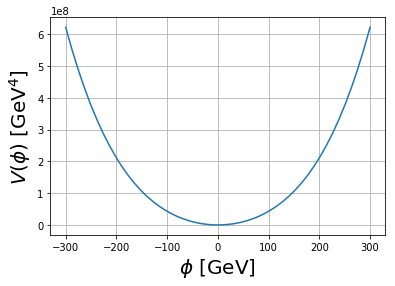

In [73]:
ϕ=np.linspace(-300,300)
Vp=lambda ϕ: 0.5*μ**2*ϕ**2+0.25*λ*ϕ**4
plt.plot(ϕ, Vp(ϕ) )
plt.xlabel(r'$\phi$ [GeV]',size=20 )
plt.ylabel(r'$V(\phi)$ [GeV]',size=20)
plt.xlabel(r'$\phi$ [GeV]',size=20 )
plt.ylabel(r'$V(\phi)$ [GeV$^4$]',size=20)
plt.grid()

In [74]:
μ=μ*1j
V=lambda ϕ: Vp(ϕ).real

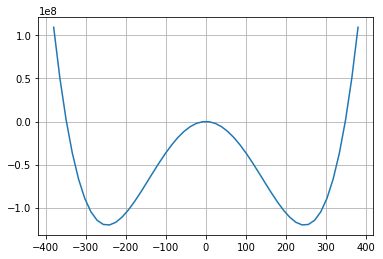

In [75]:
ϕ=np.linspace(-380,380)
plt.plot(ϕ, V(ϕ) )
plt.grid()

In [76]:
fp=optimize.fmin_powell(V,200,ftol=1E-16,full_output=True)

Optimization terminated successfully.
         Current function value: -120308559.069597
         Iterations: 4
         Function evaluations: 74


In [77]:
ϕ_min=fp[0]

In [78]:
print(ϕ_min,v)

246.21964987858152 246.21965079413738


##  Activity 
For a complex scalar field with potential
\begin{equation}
V(\phi)=\mu^2\phi^*\phi + \lambda (\phi^*\phi)^2
\end{equation}
with 
\begin{equation}
\phi=\frac{\phi_1+i\phi_2  }{\sqrt{2} }
\end{equation}
and $\mu^2<0$, and $\lambda>0$, find some of the infinite number of minimum values of $\phi$ 

In [ ]:
m=89j
l=λ

In [ ]:
def f(x):
    return ( 0.5*m**2*(x[0]**2+x[1]**2)+0.25*l*(x[0]**2+x[1]**2)**2).real

In [38]:
fmin=optimize.fmin_powell(f,[0,0],ftol=1E-16,full_output=True)
fmin[0]

Optimization terminated successfully.
         Current function value: -119793805.867789
         Iterations: 3
         Function evaluations: 129


array([245.95486481,  -0.69854784])

In [ ]:
np.sqrt( fmin[0][0]**2+fmin[0][1]**2 )

245.95585679378814

## Least action
See [Least action minimization](./least_action_minimization.ipynb)

In [ ]:
Δt=0.5
t=np.arange(0,3+Δt,Δt)
t

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. ])

In [ ]:
t[1:]

array([0.5, 1. , 1.5, 2. , 2.5, 3. ])

In [ ]:
t[:-1]

array([0. , 0.5, 1. , 1.5, 2. , 2.5])

In [ ]:
t[1:]-t[:-1]

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [ ]:
print( 'Δt=t_{i+1}-t_i=', t[1:]-t[:-1] ) 

Δt=t_{i+1}-t_i= [0.5 0.5 0.5 0.5 0.5 0.5]


In [ ]:
global g  
g=9.8

In [ ]:
def S(x,t=3.,m=0.2,xini=0.,xend=0.):
    t=float(t)
    Dt=t/x[:-1].size
    x=np.asarray(x)
    #Fix initial and final point
    x[0]=xini
    x[-1]=xend
    return ((0.5*m*(x[1:]-x[:-1])**2/Dt**2-0.5*m*g*(x[1:]+x[:-1]))*Dt).sum()

Function to find the least Action by using `scipy.optimize.fmin_powell`. It start from $\mathbf{x}=(x_{\hbox{ini}},0,0,\ldots,x_{\hbox{end}})$ and find the least action

In [ ]:
def xfit(n,t=3.,m=0.2,xini=0.,xend=0.,ftol=1E-8):
    '''Find the array of n (odd) components that minimizes the action S(x)

    :Parameters:

    n: odd integer 
        dimension of the ndarray x that minimizes the action  S(x,t,m)
    t,m: numbers
       optional parameters for the action
    ftol: number
        acceptable relative error in S(x) for convergence.

    :Returns: (x,xmax,Smin)
    
    x: ndarray
        minimizer of the action S(x)
        
    xini:
    
    xend:

    xmax: number
        Maximum height for the object

    Smin: number
        value of function at minimum: Smin = S(x)
    '''
    import scipy.optimize as optimize
    t=float(t)
    if n%2==0:
        print ( 'x array must be odd')
        sys.exit()
  
    x0=np.zeros(n)
    a=optimize.fmin_powell(S,x0,args=(t,m,xini,xend),ftol=ftol,full_output=1)
    x=a[0]
    x[0]=xini;x[-1]=xend
    xmax=np.sort(x)[-1]
    Smin=a[1]
    Dt=t/x[:-1].size #  t/(n-1)
    return x,xmax,Smin,Dt  

In [ ]:
n=11
t=3. # s
m=0.2 # g
y=xfit(n,t,m,ftol=1E-16)

Optimization terminated successfully.
         Current function value: -21.392910
         Iterations: 15
         Function evaluations: 2154


In [ ]:
y[0]

array([ 0.        ,  3.96900002,  7.05599999,  9.26099998, 10.58400002,
       11.02500004, 10.58400005,  9.26100006,  7.05600004,  3.96900001,
        0.        ])

In [ ]:
x=y[0]

In [ ]:
x=y[0]
t=np.linspace(0,3,n)
P=poly1d ( np.polyfit(t,x,2) )
print( P )

      2
-4.9 x + 14.7 x - 1.402e-08


Text(0.5,1,'$S_{\\rm min}=-21.3929$')

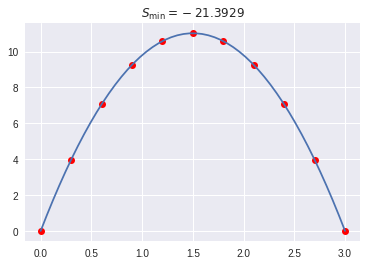

In [ ]:
plt.plot(t,x,'ro')
T=np.linspace(0,3)
plt.plot(T,P(T))
plt.title(r'$S_{\rm min}=%g$' %y[2])

In [ ]:
t=3.
m=0.2
n=21
y=xfit(n,t,m)
x=y[0]
Smin=y[2]
Dt=t/x[:-1].size
tx=np.arange(0,t+Dt,Dt)

Optimization terminated successfully.
         Current function value: -21.554977
         Iterations: 28
         Function evaluations: 5837


In [ ]:
x=y[0]
t=np.linspace(0,3,n)
P=poly1d ( np.polyfit(t,x,2) )
print( P )

      2
-4.9 x + 14.7 x + 0.0001604


In [ ]:
x=y[0]
t=tx
Dt

0.15

In [ ]:
m

0.2

In [ ]:
0.5*m*((x[:1]-x[:-1])/Dt)**2+m*g*((x[:1]+x[:-1])/2)

array([  0.        ,  21.55712992,  73.91284699, 146.0420276 ,
       228.21348894, 312.00329681, 390.30425847, 457.22580097,
       508.26594986, 540.20139067, 551.05824894, 540.19663702,
       508.27028432, 457.21813084, 390.2603388 , 311.97587507,
       228.18868613, 146.02183087,  73.90046308,  21.55285329])

### Further material
http://www.damtp.cam.ac.uk/user/nsm10/PrincLeaAc.pdf
https://jfuchs.hotell.kau.se/kurs/amek/prst/14_hpvp.pdf

https://www.coursera.org/learn/general-relativity/lecture/8UHtE/the-least-action-or-minimal-action-principle-part-1

https://jfi.uchicago.edu/~tten/from.panza/Physics185/Handouts/rubber-band%20analogy.pdf